In [1]:
import sys
sys.path.insert(0,"../")
import time

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

from src.optimizers.neioptimizer import *
from src.utils.config import CONFIG
CONFIG

{'distribute': {'computer_list': ['tst008@acet116-lnx-10.bucknell.edu',
   'tst008@acet116-lnx-11.bucknell.edu',
   'tst008@acet116-lnx-12.bucknell.edu'],
  'max_jobs': 1,
  'min_gpu': 500},
 'optimizer': {'num_restarts': 10,
  'raw_samples': 500,
  'options': {'batch_limit': 5, 'max_iter': 200, 'seed': 0}}}

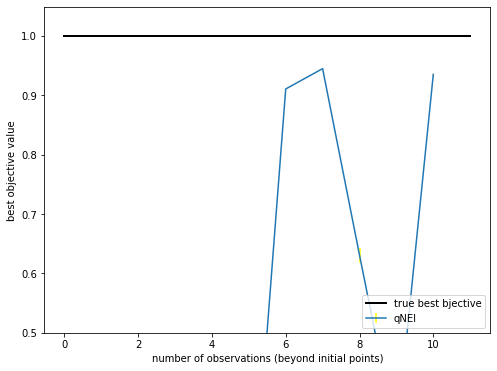

In [292]:
from botorch.test_functions.synthetic import Hartmann

def visualize():
    file_name = "../yaleface.json"
    # Load the data
    train_obj_nei, train_yvar_nei = [], []
    with open(file_name, "r") as f:
        for line in f.readlines():
            observation = json.loads(line)
            train_obj_nei.append(observation["result"][0])
            train_yvar_nei.append(observation["result"][1])

#     neg_hartmann6 = Hartmann(negate=True)
#     GLOBAL_MAXIMUM = neg_hartmann6.optimal_value
    GLOBAL_MAXIMUM = 1

    iters = np.arange(max(len(train_obj_nei), len(train_obj_nei)))
    y_nei = np.array(train_obj_nei)
    y_err = np.array(train_yvar_nei)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.errorbar(iters, y_nei, yerr=y_err, label="qNEI", linewidth=1.5, ecolor=['yellow'])
    plt.plot([0, iters.shape[0]], [GLOBAL_MAXIMUM] * 2, 'k', label="true best bjective", linewidth=2)
    ax.set_ylim(bottom=0.5)
    ax.set(xlabel='number of observations (beyond initial points)', ylabel='best objective value')
    ax.legend(loc="lower right")
    plt.show()

count = 199
while count < 200:
    visualize()
    clear_output(wait=True)
    time.sleep(2)
    count += 1

In [3]:
import os
os.getcwd()

'/home/tung/summer/notebooks'

In [ ]:
datetime.datetime.now().strftime("%m/%d/%Y-%H:%M:%S")

In [288]:
from botorch.utils.transforms import (
    match_batch_shape
)
X = torch.rand((1,1,6))
X, X.shape

(tensor([[[0.0434, 0.3694, 0.9811, 0.5450, 0.7956, 0.7019]]]),
 torch.Size([1, 1, 6]))

In [289]:
X.shape, match_batch_shape(X, torch.tensor([])).shape

(torch.Size([1, 1, 6]), torch.Size([1, 1, 1, 6]))

In [290]:
torch.cat([X, match_batch_shape(X, torch.tensor([]))], dim=-2)

RuntimeError: invalid argument 0: Tensors must have same number of dimensions: got 3 and 4 at /pytorch/aten/src/TH/generic/THTensor.cpp:603